# 7.2. Autoregressive Model (AR)

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (18, 9)

In [71]:
df = pd.read_csv('/Users/maxim/codebase/python/spiced_projects/random-forest-fennel-encounter-notes/week_07/data/flights_remainder.csv', index_col='date')
df

,remainder
date,
1949-01-01,4.405303
1949-02-01,17.496212
1949-03-01,7.496212
1949-04-01,9.587121
1949-05-01,-5.231061
...,...
1959-08-01,8.867424
1959-09-01,-7.132576
1959-10-01,-9.496212


In [72]:
# Create a time-lagged input feature:
df['lag1'] = df['remainder'].shift(1)
df['lag2'] = df['remainder'].shift(2)
df['lag3'] = df['remainder'].shift(3)
df

,remainder,lag1,lag2,lag3
date,,,,
1949-01-01,4.405303,NaN,NaN,NaN
1949-02-01,17.496212,4.405303,NaN,NaN
1949-03-01,7.496212,17.496212,4.405303,NaN
1949-04-01,9.587121,7.496212,17.496212,4.405303
1949-05-01,-5.231061,9.587121,7.496212,17.496212
...,...,...,...,...
1959-08-01,8.867424,4.776515,-6.587121,-5.041667
1959-09-01,-7.132576,8.867424,4.776515,-6.587121
1959-10-01,-9.496212,-7.132576,8.867424,4.776515


In [98]:
# Calculate the correlation coefficient between the time-lagged and the original remainder
corr = round(df[['remainder', 'lag1', 'lag2', 'lag3']].corr(), 2)
corr

,remainder,lag1,lag2,lag3
remainder,1.00,0.76,0.60,0.39
lag1,0.76,1.00,0.76,0.60
lag2,0.60,0.76,1.00,0.76
lag3,0.39,0.60,0.76,1.00


<AxesSubplot:>

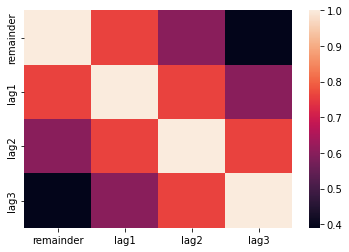

In [99]:
import seaborn as sns

sns.heatmap(corr)

Note: $lag2=0.6$, while $lag1*lag1 = 0.58$. Meaning that most part of lag2 can be explained by lag1. So, we don't need lag2, lag3 and so on.

In [83]:
tmp = df.melt(id_vars=['remainder'])
tmp

,remainder,variable,value
0,9.587121,lag1,7.496212
1,-5.231061,lag1,9.587121
2,-12.776515,lag1,-5.231061
3,-19.412879,lag1,-12.776515
4,-20.321970,lag1,-19.412879
...,...,...,...
511,8.867424,prediction_ar,3.050029
512,-7.132576,prediction_ar,8.458890
513,-9.496212,prediction_ar,-4.567452
514,-8.587121,prediction_ar,-10.059042


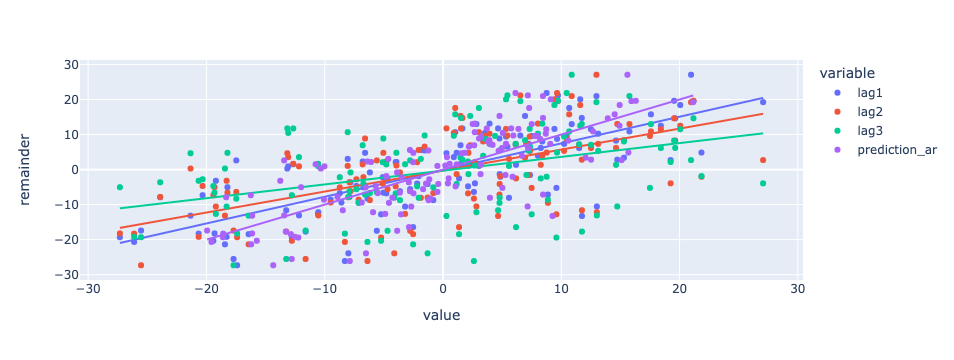

In [84]:
# Create a scatterplot with df['lag1'] on the x-axis and df['remainder'] on the y-axis
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(tmp, x="value", y="remainder", color='variable', trendline="ols")
fig.show()

In [85]:
from sklearn.linear_model import LinearRegression

df.dropna(inplace=True)

X = df[['lag1', 'lag2', 'lag3']]
y = df['remainder']

m = LinearRegression()
m.fit(X, y)
df['prediction_ar'] = m.predict(X)
df


,remainder,lag1,lag2,lag3,prediction_ar
date,,,,,
1949-04-01,9.587121,7.496212,17.496212,4.405303,7.804036
1949-05-01,-5.231061,9.587121,7.496212,17.496212,5.019509
1949-06-01,-12.776515,-5.231061,9.587121,7.496212,-3.549254
1949-07-01,-19.412879,-12.776515,-5.231061,9.587121,-12.230831
1949-08-01,-20.321970,-19.412879,-12.776515,-5.231061,-15.740037
...,...,...,...,...,...
1959-08-01,8.867424,4.776515,-6.587121,-5.041667,3.050029
1959-09-01,-7.132576,8.867424,4.776515,-6.587121,8.458890
1959-10-01,-9.496212,-7.132576,8.867424,4.776515,-4.567452


<AxesSubplot:xlabel='date'>

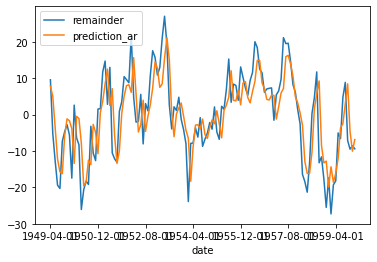

In [87]:
df[['remainder', 'prediction_ar']].plot()

Figure(1296x648)


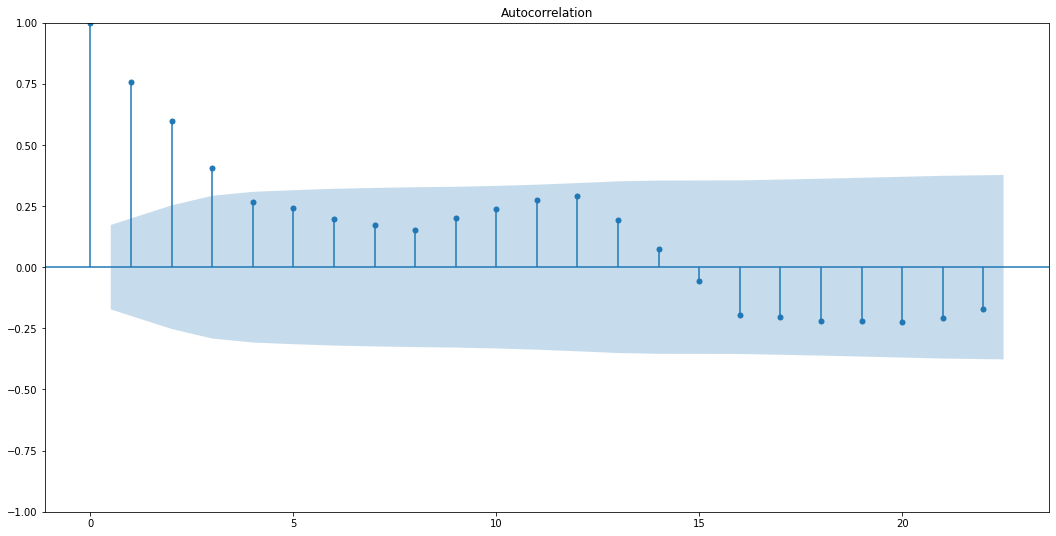

In [115]:
# correnation between remainder and lags (X is a lag level, y is correlation)
# lag0 is correlates to remainder with corr=1 (because there is no lag and lag0=remainder)

from statsmodels.graphics.tsaplots import plot_acf

print(plot_acf(df['remainder']))

Figure(1296x648)


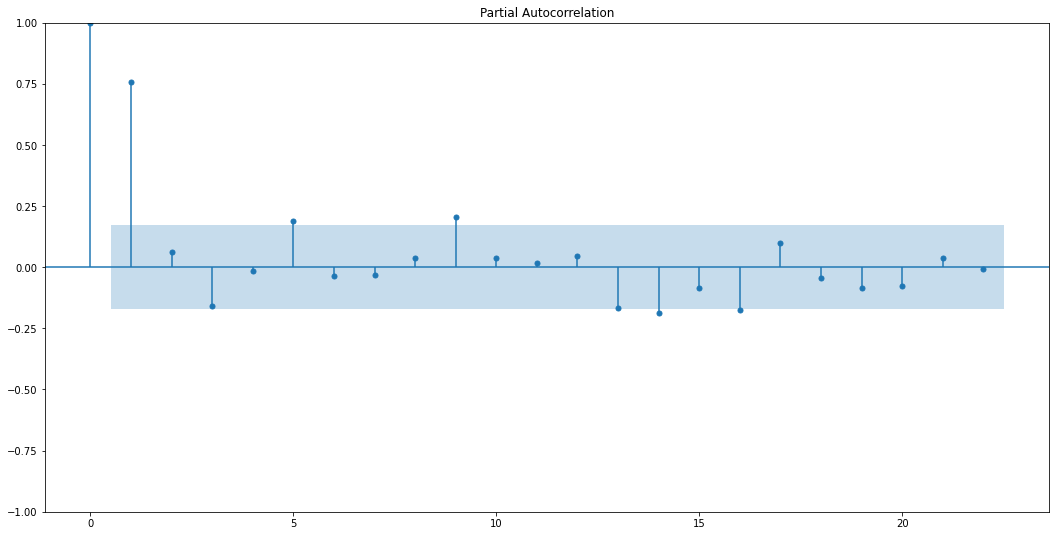

In [112]:
# partial (direct) correlation between lag level and remainder (that is not explained by previous lag with lower level)

from statsmodels.graphics.tsaplots import plot_pacf

print(plot_pacf(df['remainder'], method='ywm'))

In [114]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
selected_order = ar_select_order(df['remainder'], maxlag=12)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

